In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sn
%matplotlib inline

In [20]:
#machine learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
#import keras 
#from keras.models import Sequential 
#from keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [21]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [22]:
#total null values 
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [23]:
#parcentagewise null values
def missing_data_table(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
missing_data_table(df)

,Total,Percent
bmi,201,0.039335
id,0,0.000000
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000


In [24]:
df.fillna(0)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,0.0,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,0.0,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [25]:
#categorical Columns OneHotEncoder
from sklearn.base import TransformerMixin,BaseEstimator
from sklearn.preprocessing import OneHotEncoder
class My_encoder(BaseEstimator, TransformerMixin):
   
    def __init__(self,drop = 'first',sparse=False):
        self.encoder = OneHotEncoder(drop = drop,sparse = sparse)
        self.features_to_encode = []
        self.columns = []
    
    def fit(self,X_train,features_to_encode):
        
        data = X_train.copy()
        self.features_to_encode = features_to_encode
        data_to_encode = data[self.features_to_encode]
        self.columns = pd.get_dummies(data_to_encode,drop_first = True).columns
        self.encoder.fit(data_to_encode)
        return self.encoder
    
    def transform(self,X_test):
        
        data = X_test.copy()
        data.reset_index(drop = True,inplace =True)
        data_to_encode = data[self.features_to_encode]
        data_left = data.drop(self.features_to_encode,axis = 1)
        data_encoded = pd.DataFrame(self.encoder.transform(data_to_encode),columns = self.columns)
        
        return pd.concat([data_left,data_encoded],axis = 1)

In [26]:
features_to_encode = ['gender','ever_married','work_type','Residence_type','smoking_status']
numerical_features=df.drop(features_to_encode,axis=1)
enc = My_encoder()
enc.fit(df,features_to_encode)
df = enc.transform(df)
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,51676,61.0,0,0,202.21,NaN,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31112,80.0,0,1,105.92,32.5,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60182,49.0,0,0,171.23,34.4,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1665,79.0,1,0,174.12,24.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5110 non-null   int64  
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   int64  
 3   heart_disease                   5110 non-null   int64  
 4   avg_glucose_level               5110 non-null   float64
 5   bmi                             4909 non-null   float64
 6   stroke                          5110 non-null   int64  
 7   gender_Male                     5110 non-null   float64
 8   gender_Other                    5110 non-null   float64
 9   ever_married_Yes                5110 non-null   float64
 10  work_type_Never_worked          5110 non-null   float64
 11  work_type_Private               5110 non-null   float64
 12  work_type_Self-employed         51

In [28]:
#corrMatrix = df.corr()
#plt.figure(figsize=(20,7))
#sn.heatmap(corrMatrix, annot=True, cmap="magma", fmt=".3f")
#plt.show()

In [29]:
##fill up na values with randomForrestRegressor
from sklearn.ensemble import RandomForestRegressor
df_sub = df
X_train  = df_sub.dropna().drop('bmi', axis=1)
y_train  = df['bmi'].dropna()
X_test = df_sub.loc[np.isnan(df.bmi)].drop('bmi', axis=1)
regressor = RandomForestRegressor(n_estimators = 300)
regressor.fit(X_train, y_train)
y_pred = np.round(regressor.predict(X_test),1)
df.bmi.loc[df.bmi.isnull()] = y_pred

c:\users\ziaul\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [30]:
missing_data_table(df)

,Total,Percent
id,0,0.0
age,0,0.0
smoking_status_never smoked,0,0.0
smoking_status_formerly smoked,0,0.0
Residence_type_Urban,0,0.0
work_type_children,0,0.0
work_type_Self-employed,0,0.0
work_type_Private,0,0.0
work_type_Never_worked,0,0.0
ever_married_Yes,0,0.0


In [31]:
y_true=df["stroke"]
X_train,X_test,y_train,y_test = train_test_split(df,y_true,test_size=0.2,random_state=0)

In [32]:
def Model(model,name):
    model.fit(X_train,y_train)
    score = model.score(X_test, y_test)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    prediction = model.predict(X_test)
    cm = confusion_matrix(y_test,prediction)
    print('{} Trainng Score {}\n'.format(name,model_train_score))
    print('{} Testing Score {}\n'.format(name,model_test_score))
    print('{} Testing Score {}\n'.format(name,score))
    plot_confusion_matrix(model,X_test,y_test,cmap="magma")

c:\users\ziaul\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression Trainng Score 0.951320939334638

Logistic Regression Testing Score 0.9461839530332681

Logistic Regression Testing Score 0.9461839530332681



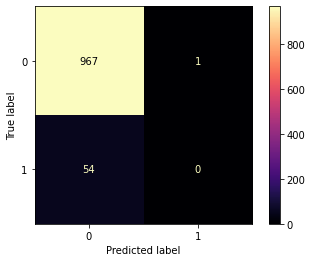

In [33]:
lr=LogisticRegression()
Model(lr,"Logistic Regression")

Decision Tree Trainng Score 1.0

Decision Tree Testing Score 1.0

Decision Tree Testing Score 1.0



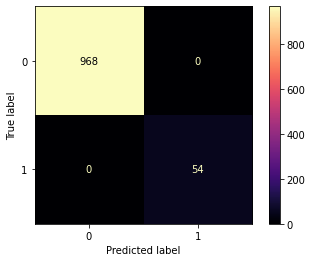

In [34]:
dtc=DecisionTreeClassifier()
Model(dtc,"Decision Tree")

SVM Trainng Score 0.9522994129158513

SVM Testing Score 0.9471624266144814

SVM Testing Score 0.9471624266144814



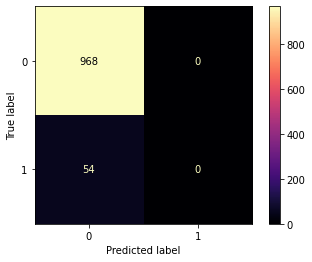

In [35]:
from sklearn import svm
clf = svm.SVC()
Model(clf,"SVM")

In [36]:
#Neural Network
#model = Sequential()
#model.add(Dense(9, kernel_initializer="normal", activation = 'relu', input_dim = 18))
#model.add(Dense(9, kernel_initializer='glorot_uniform', activation = 'relu'))
#model.add(Dense(5, kernel_initializer='glorot_uniform', activation = 'relu'))
#model.add(Dense(1, kernel_initializer='glorot_uniform', activation = 'sigmoid'))

In [37]:
#model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])
#model.fit(X_train, y_train, batch_size = 32 , epochs = 500)